1. Importing the previous application

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
sns.set_style("whitegrid")

In [156]:
previous_master_df = pd.read_csv('previous_application.csv')
previous_master_df.sort_values(by='SK_ID_CURR', ascending=True, inplace=True)
previous_master_df.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
935548,1564014,100004,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
1259112,1857999,100005,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,10,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1378978,2495675,100005,Consumer loans,4813.200,44617.5,40153.5,4464.0,44617.5,THURSDAY,11,...,Connectivity,12.0,high,POS mobile with interest,365243.0,-706.0,-376.0,-466.0,-460.0,0.0
900957,1489396,100006,Revolving loans,13500.000,270000.0,270000.0,NaN,270000.0,THURSDAY,15,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
1607443,1697039,100006,Cash loans,32696.100,688500.0,906615.0,NaN,688500.0,THURSDAY,15,...,XNA,48.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
previous_master_df.shape

(1670214, 37)

2. Checking the datatype of existing dataset

In [158]:
previous_master_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

3. Finding percentage of missing values for all the columns

In [159]:
round(100*(previous_master_df.isnull().sum()/len(previous_master_df.index)), 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

4. Removing columns with more than 30% missing values

In [160]:
previous_master_df = previous_master_df[previous_master_df.columns[previous_master_df.isnull().mean() < 0.3]]
previous_master_df.shape

(1670214, 26)

In [161]:
previous_master_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

5. Dropping some unwanted columns and keeping some relevant to do further analysis

In [162]:
previous_master_df = previous_master_df.drop('WEEKDAY_APPR_PROCESS_START', axis=1)
previous_master_df = previous_master_df.drop('HOUR_APPR_PROCESS_START', axis=1)
previous_master_df = previous_master_df.drop('FLAG_LAST_APPL_PER_CONTRACT', axis=1)
previous_master_df = previous_master_df.drop('NFLAG_LAST_APPL_IN_DAY', axis=1)

In [163]:
previous_master_df = previous_master_df.drop('NAME_CASH_LOAN_PURPOSE', axis=1)
previous_master_df = previous_master_df.drop('NAME_PORTFOLIO', axis=1)
previous_master_df = previous_master_df.drop('NAME_PRODUCT_TYPE', axis=1)
previous_master_df = previous_master_df.drop('SELLERPLACE_AREA', axis=1)
previous_master_df = previous_master_df.drop('NAME_YIELD_GROUP', axis=1)
previous_master_df = previous_master_df.drop('PRODUCT_COMBINATION', axis=1)

In [164]:
previous_master_df = previous_master_df.drop('NAME_PAYMENT_TYPE', axis=1)
previous_master_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,24835.5,Approved,-1740,XAP,Refreshed,Mobile,Country-wide,Connectivity,8.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,-606,XAP,New,Vehicles,Stone,Auto technology,24.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,-746,XAP,Repeater,XNA,Credit and cash offices,XNA,12.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,-828,XAP,Refreshed,Furniture,Stone,Furniture,6.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,-2341,XAP,Refreshed,Consumer Electronics,Country-wide,Consumer electronics,12.0


In [165]:
previous_master_df.shape

(1670214, 15)

6. Deleting rows which has more than 50% missing values

In [166]:
previous_master_df = previous_master_df.dropna(thresh=9)

In [167]:
previous_master_df.shape

(1670214, 15)

7. Analysis on different columns

a. NAME_CONTRACT_STATUS

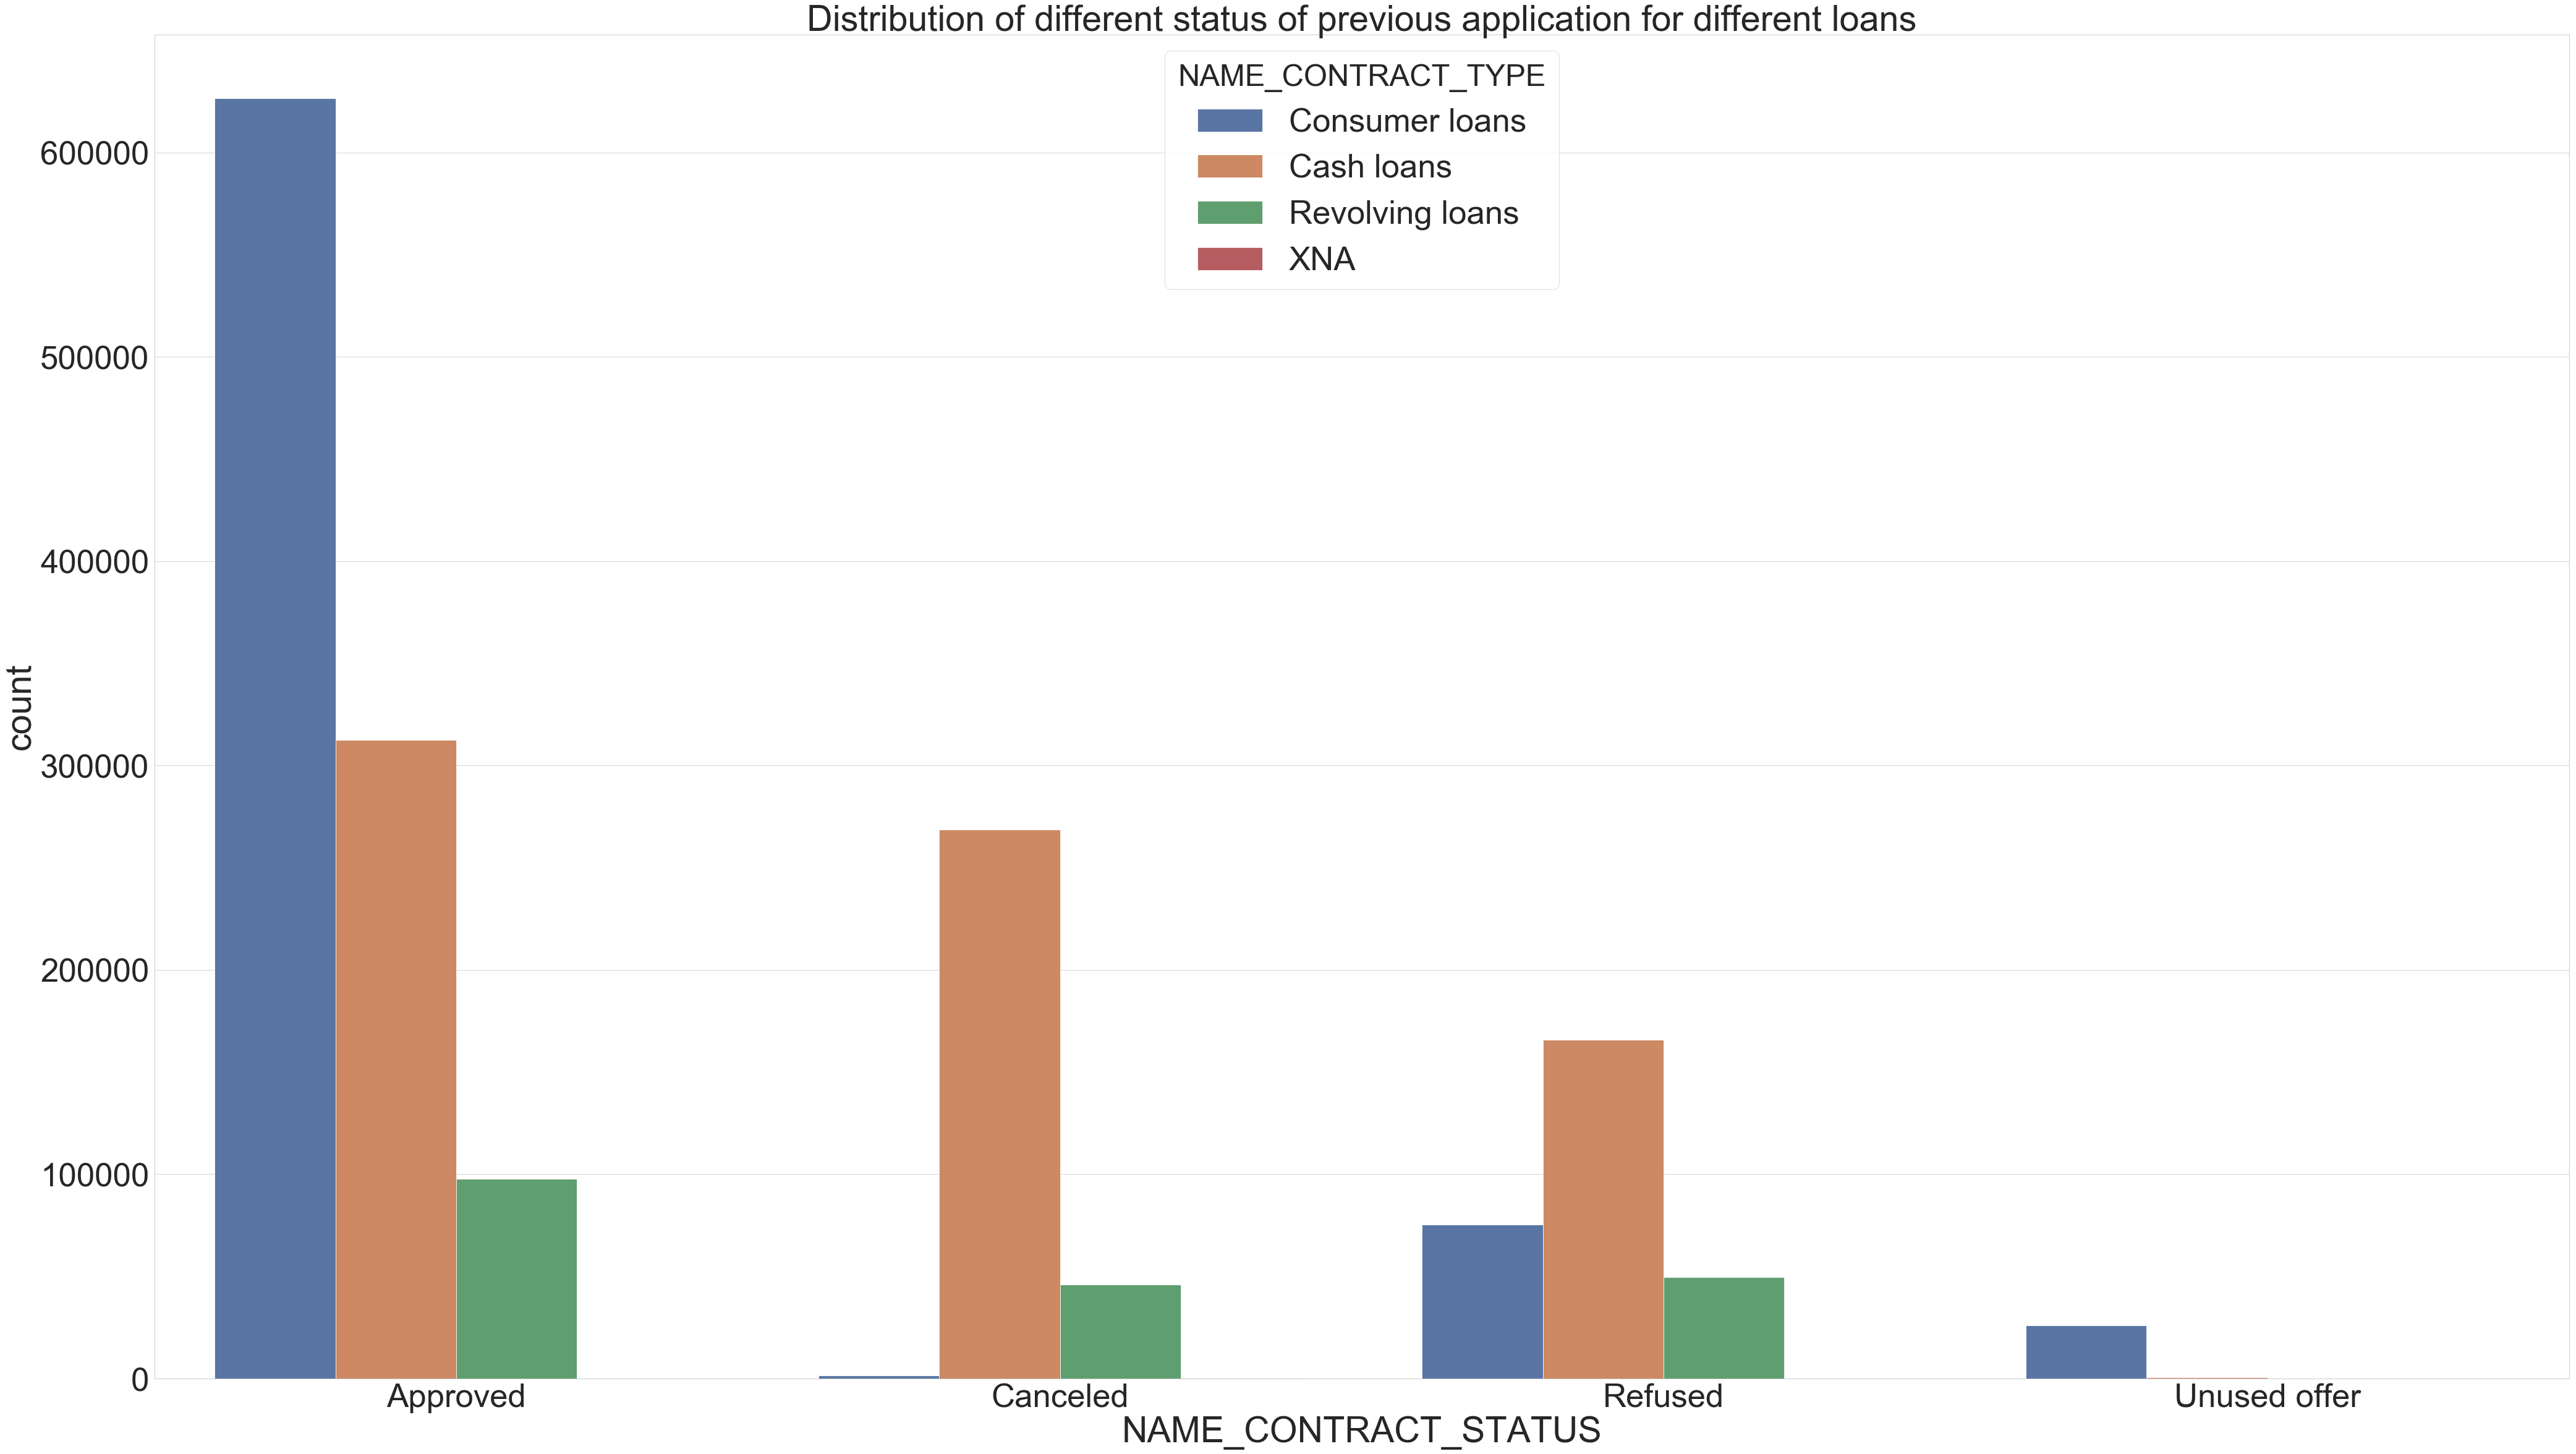

In [168]:
plt.figure(figsize=(70, 40))
sns.set_context("paper", font_scale=6, rc={"font.size":6})
sns.countplot(x="NAME_CONTRACT_STATUS", hue="NAME_CONTRACT_TYPE", data=previous_master_df)
plt.rcParams["axes.labelsize"] = 20
plt.title('Distribution of different status of previous application for different loans')
plt.show()
plt.close()

Findings: 
1. Consumer Loans are the most approved loans.
2. Cash loans are the most refused, but more of then are canceled.

Deriving two different dataset for each of comparison in 'Apporved' and 'Refused' applications

In [169]:
refused_df = previous_master_df[previous_master_df['NAME_CONTRACT_STATUS'] == 'Refused']
refused_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT
1607443,1697039,100006,Cash loans,32696.100,688500.0,906615.0,688500.0,Refused,-181,LIMIT,Repeater,XNA,Credit and cash offices,XNA,48.0
268783,2668005,100011,Cash loans,NaN,0.0,0.0,0.0,Refused,-1162,LIMIT,Repeater,XNA,Credit and cash offices,XNA,NaN
35014,2531618,100027,Cash loans,22556.475,225000.0,239850.0,225000.0,Refused,-181,HC,Repeater,XNA,AP+ (Cash loan),XNA,12.0
119580,2691769,100030,Consumer loans,3140.460,33660.0,33660.0,33660.0,Refused,-2688,SCO,Repeater,XNA,Stone,Furniture,12.0
774355,1883850,100030,Consumer loans,6176.925,33660.0,30294.0,33660.0,Refused,-2193,LIMIT,Repeater,Furniture,Stone,Furniture,6.0


In [170]:
approved_df = previous_master_df[previous_master_df['NAME_CONTRACT_STATUS'] == 'Approved']
approved_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,24835.5,Approved,-1740,XAP,Refreshed,Mobile,Country-wide,Connectivity,8.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,179055.0,Approved,-606,XAP,New,Vehicles,Stone,Auto technology,24.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,900000.0,Approved,-746,XAP,Repeater,XNA,Credit and cash offices,XNA,12.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,337500.0,Approved,-828,XAP,Refreshed,Furniture,Stone,Furniture,6.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,68809.5,Approved,-2341,XAP,Refreshed,Consumer Electronics,Country-wide,Consumer electronics,12.0


b. AMT_CREDIT

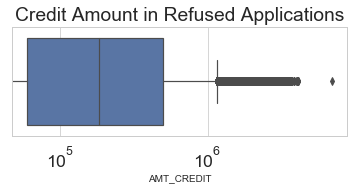

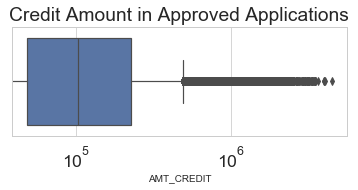

In [171]:
plt.figure(figsize=(6,2))
sns.set_context("paper", font_scale=2, rc={"font.size":2})
plt.rcParams["axes.labelsize"] = 10
sns.boxplot(x='AMT_CREDIT', data=refused_df)
plt.xscale('log')
plt.title('Credit Amount in Refused Applications')
plt.show()

plt.figure(figsize=(6,2))
sns.boxplot(x='AMT_CREDIT', data=approved_df)
plt.xscale('log')
plt.title('Credit Amount in Approved Applications')
plt.show()


Note: The range of credit amount is higher in refused applications compared to the approved one and the median is also high for same.

c. AMT_APPLICATION

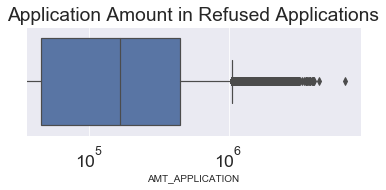

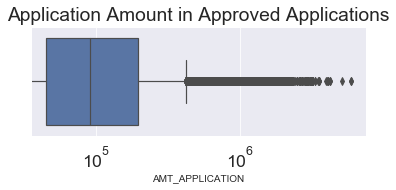

In [176]:
plt.figure(figsize=(6,2))
sns.set_context("paper", font_scale=2, rc={"font.size":2})
plt.rcParams["axes.labelsize"] = 10
sns.boxplot(x='AMT_APPLICATION', data=refused_df)
plt.xscale('log')
plt.title('Application Amount in Refused Applications')
plt.show()

plt.figure(figsize=(6,2))
sns.boxplot(x='AMT_APPLICATION', data=approved_df)
plt.xscale('log')
plt.title('Application Amount in Approved Applications')
plt.show()


Note: The application amount range is higher in refused applications and the median is also high in comparison to approved applications.

d. NAME_CLIENT_TYPE

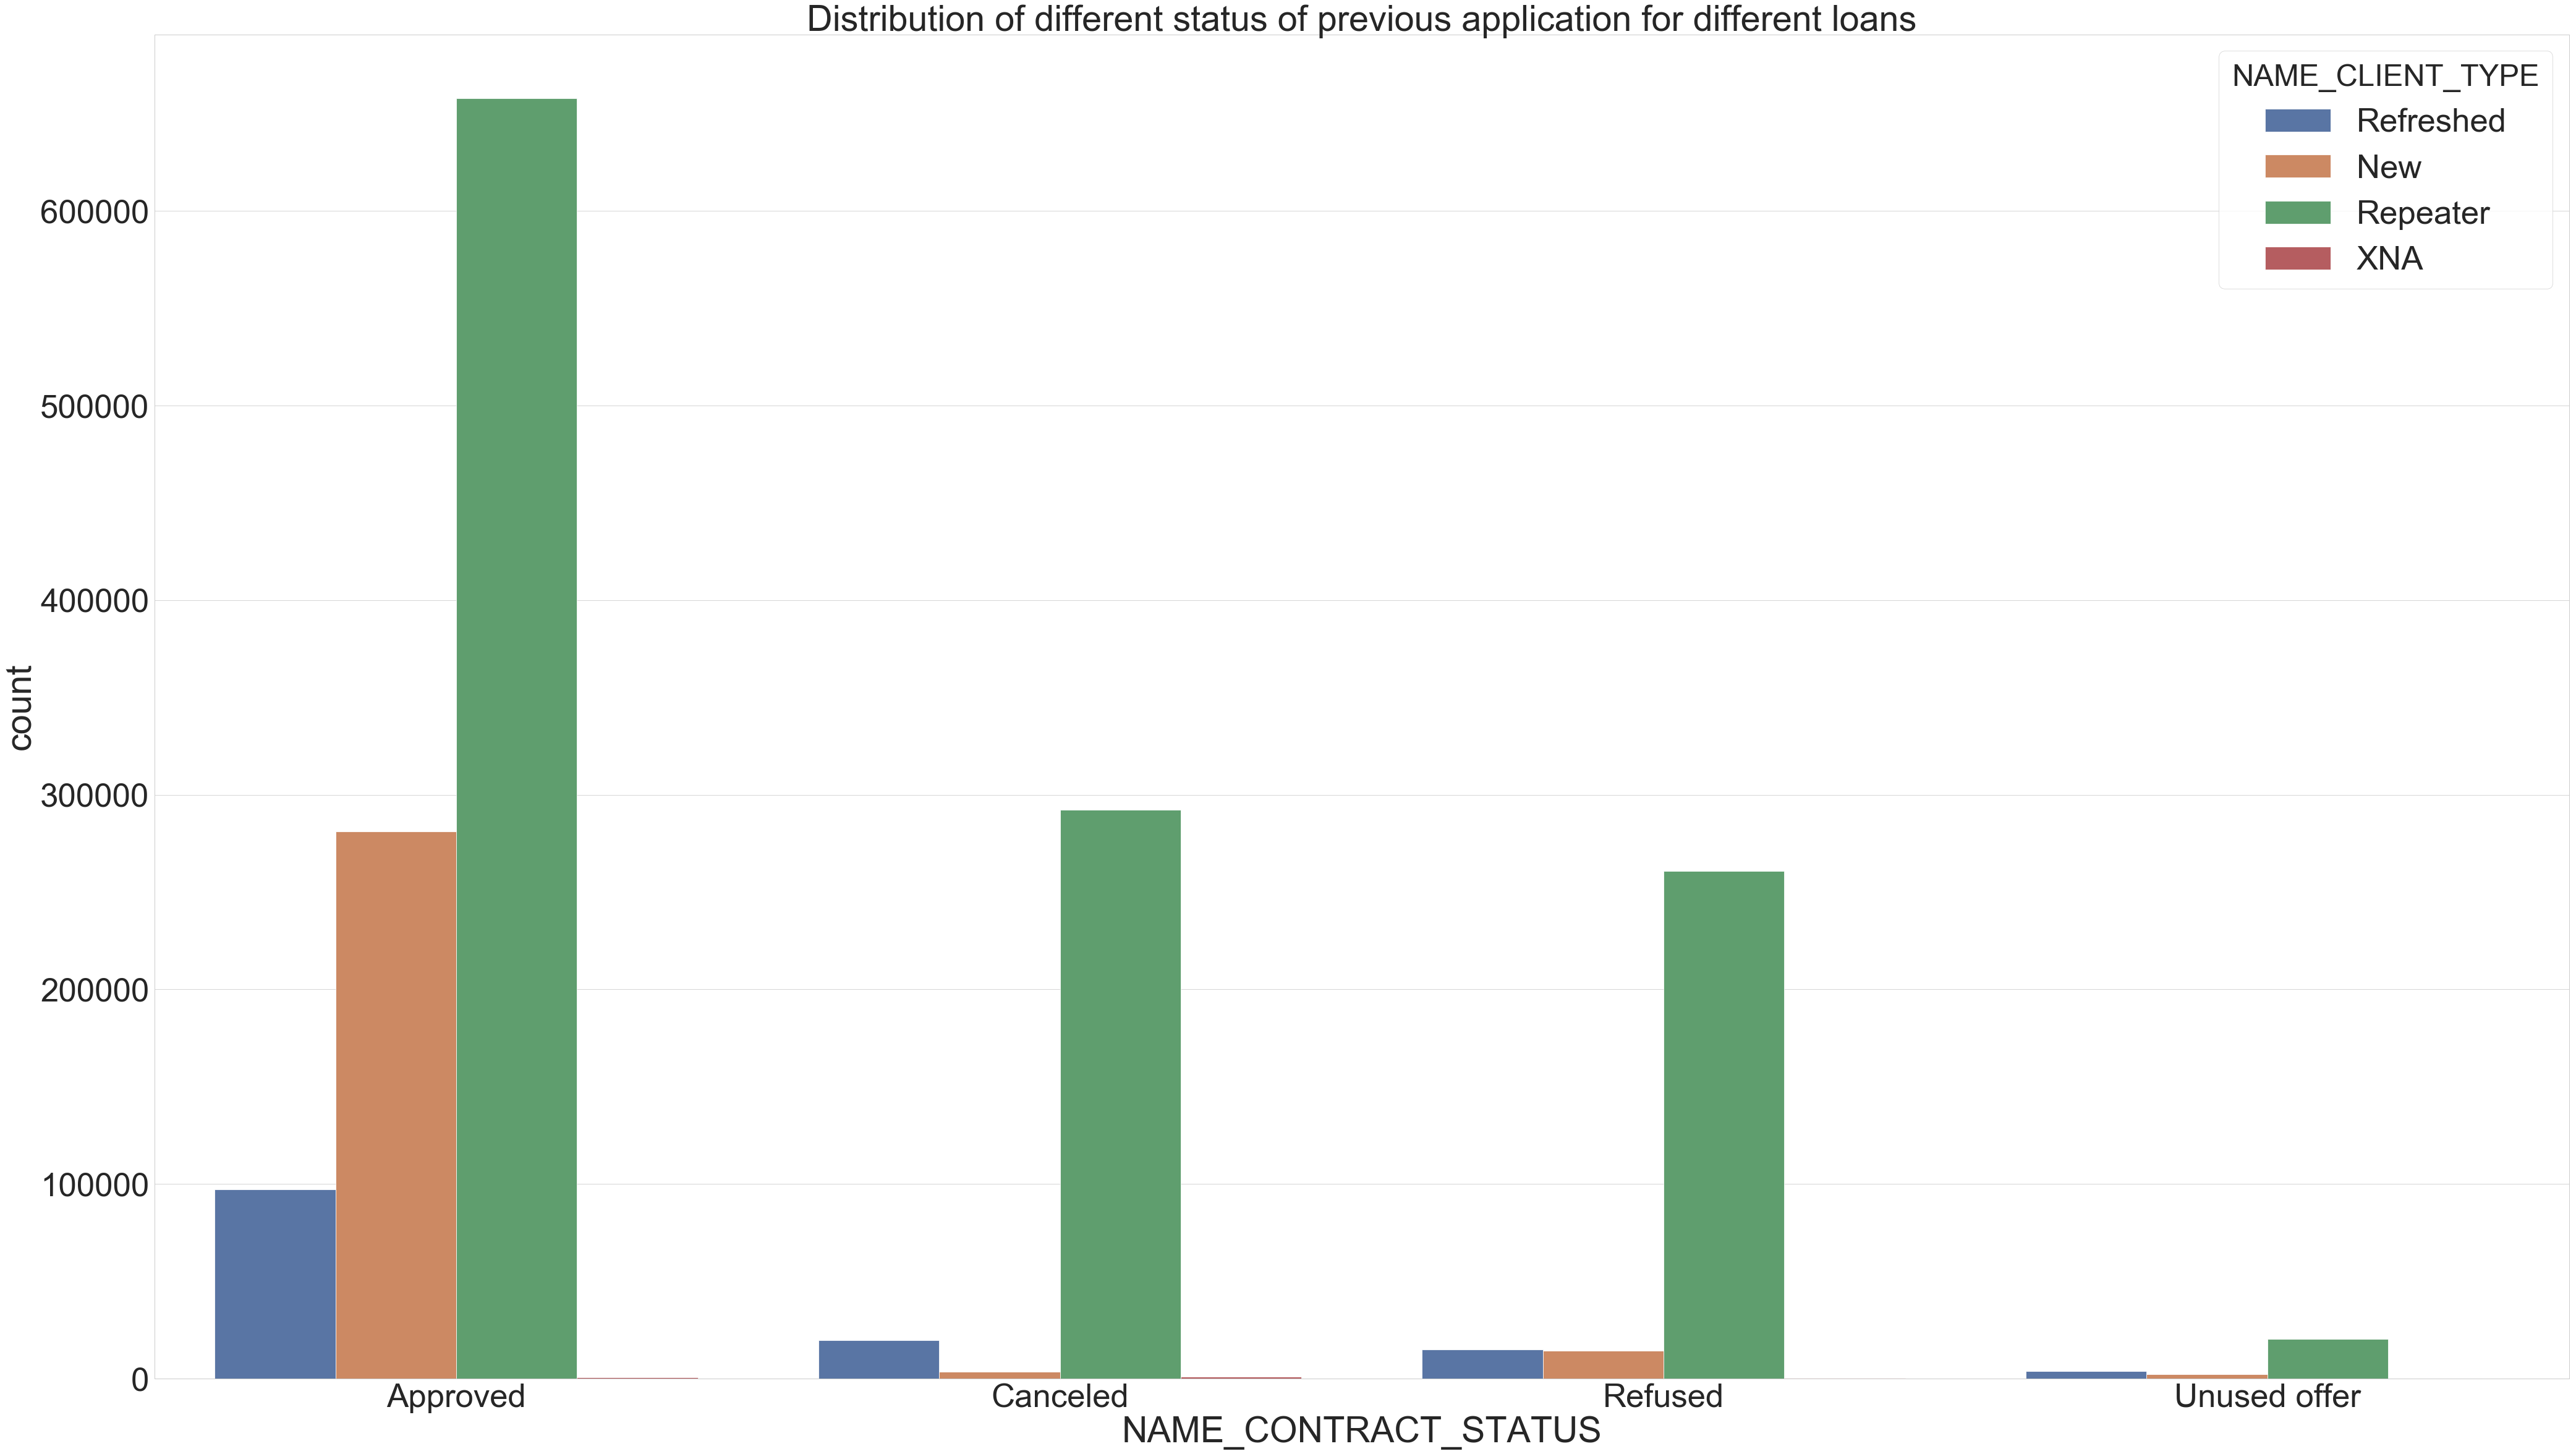

In [173]:
plt.figure(figsize=(70, 40))
sns.set_context("paper", font_scale=6, rc={"font.size":6})
sns.countplot(x="NAME_CONTRACT_STATUS", hue="NAME_CLIENT_TYPE", data=previous_master_df)
plt.rcParams["axes.labelsize"] = 20
plt.title('Distribution of different status of previous application for different loans')
plt.show()
plt.close()

Note: There are more number of repeater in trends, compared to 'New'. But New applications has less rejections in compare to repeated applications.

e. CHANNEL_TYPE

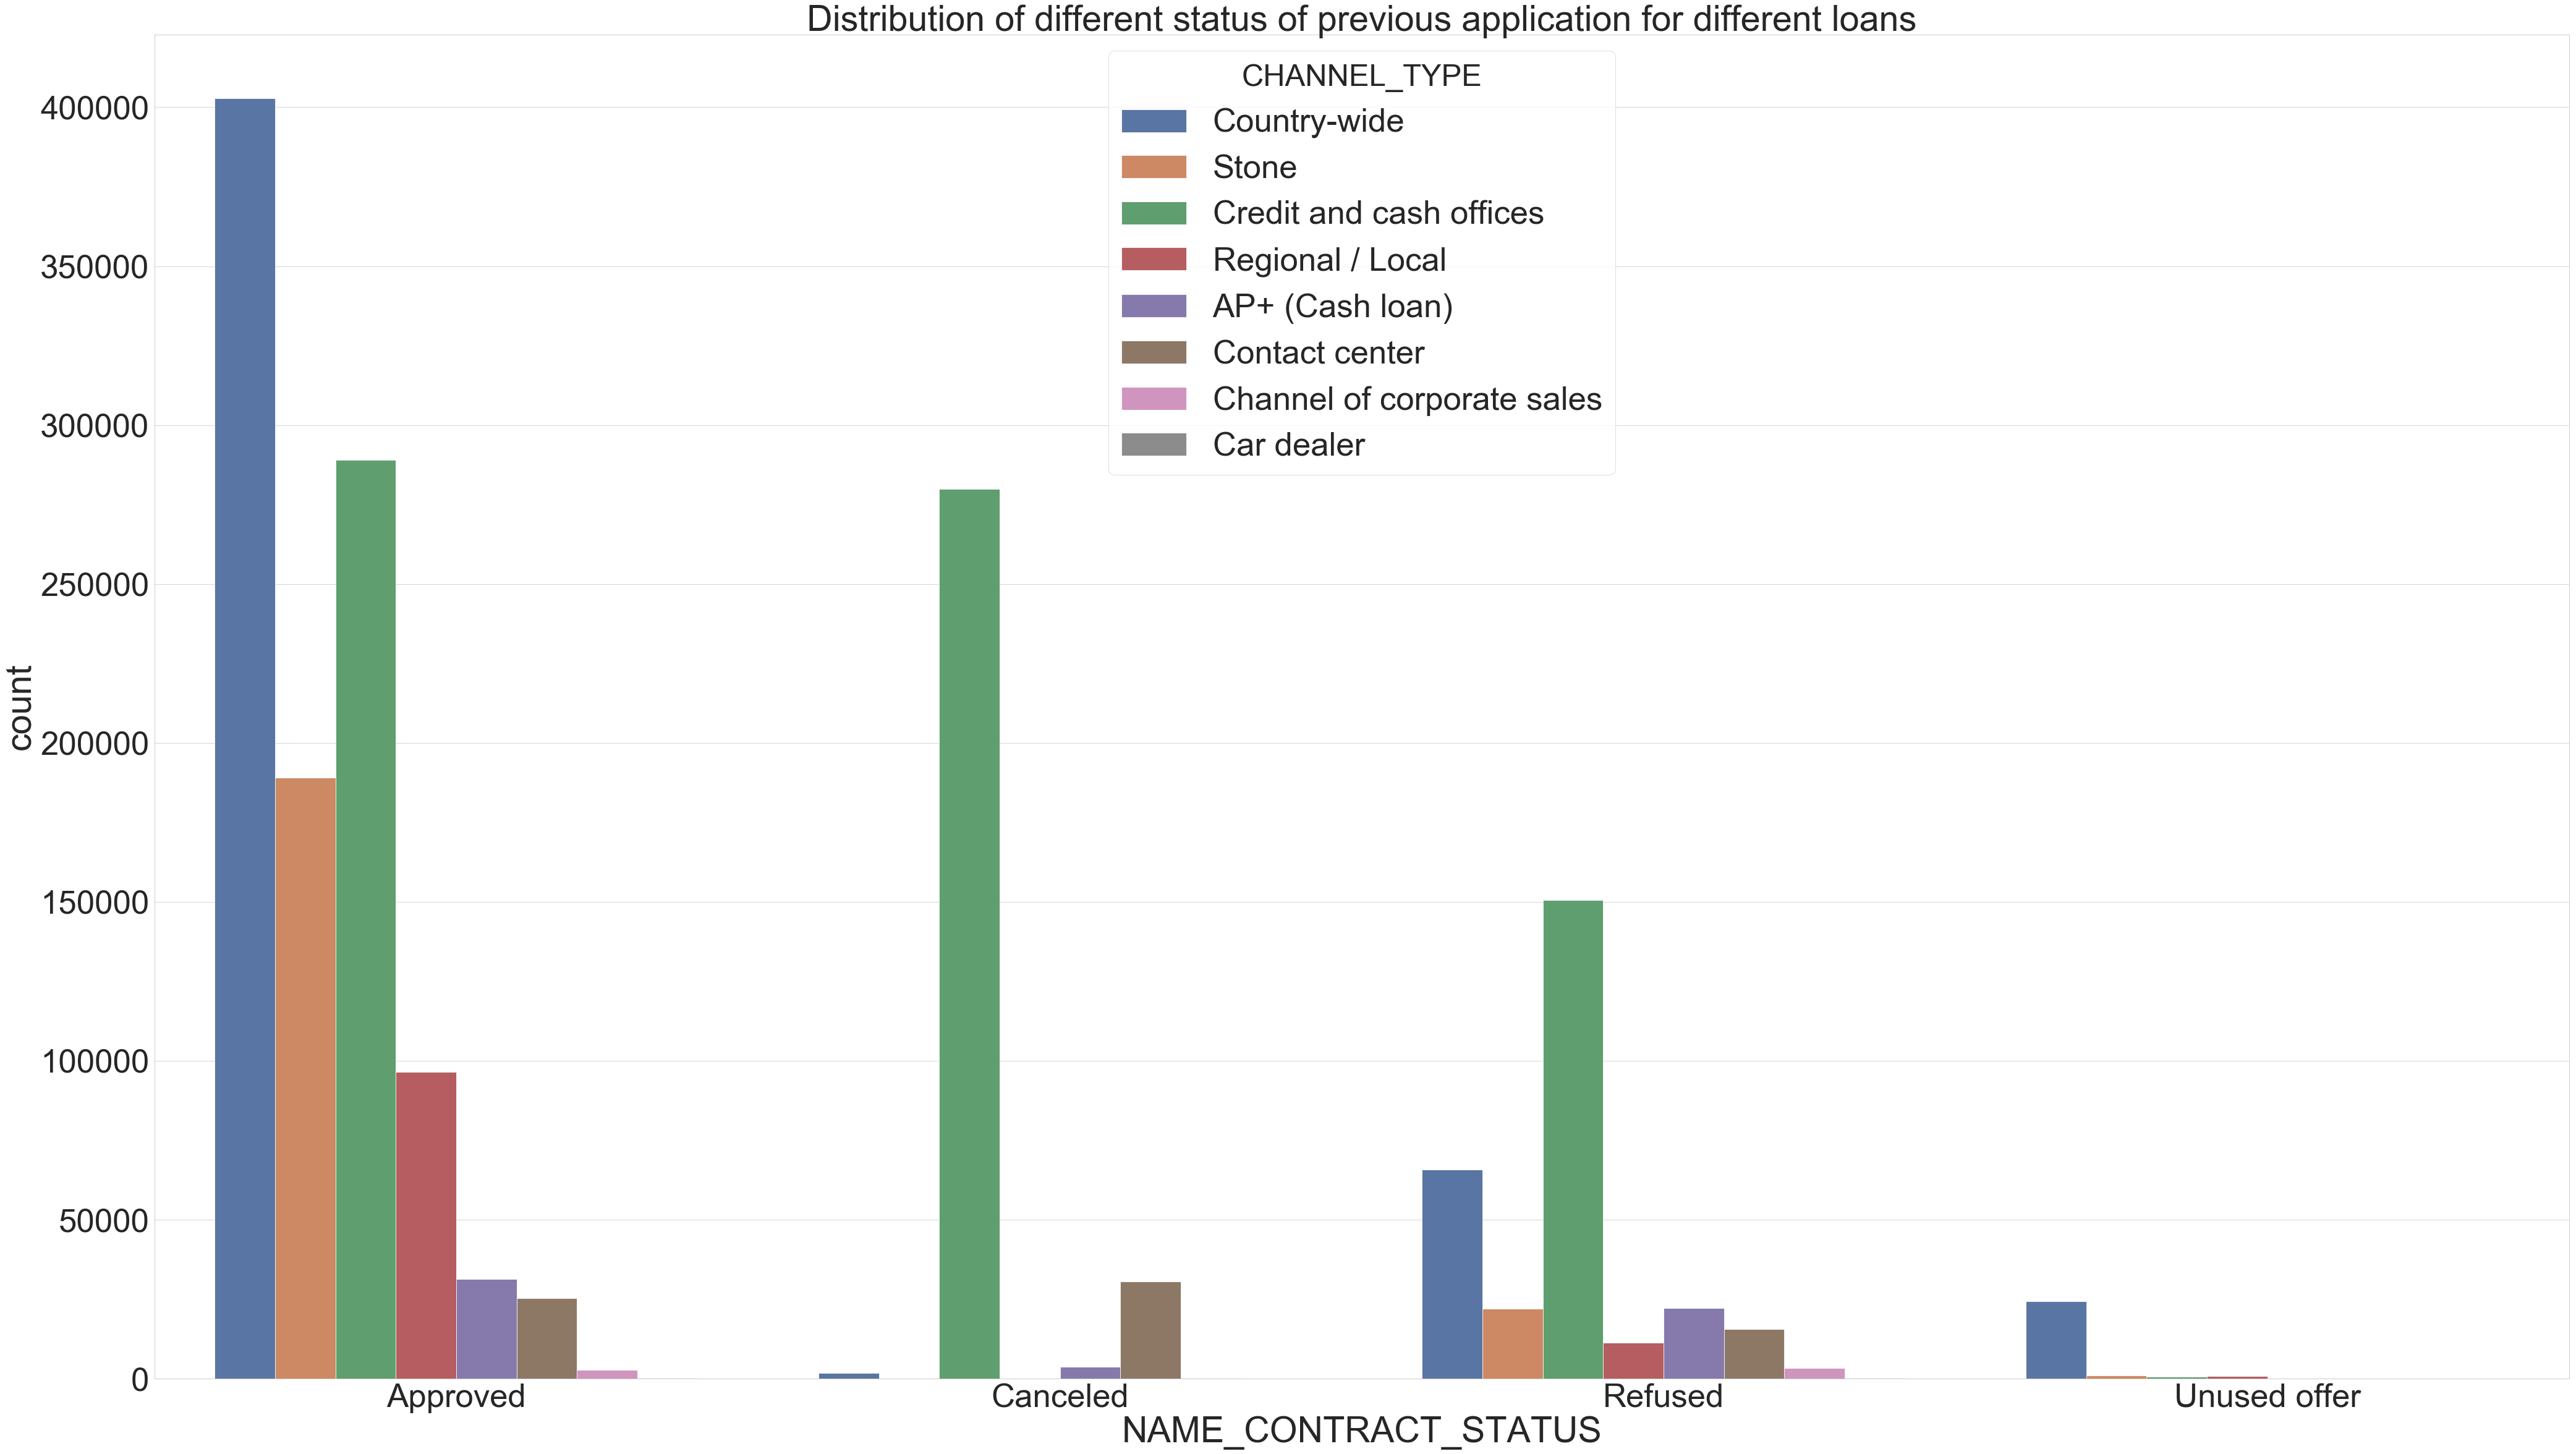

In [174]:
plt.figure(figsize=(70, 40))
sns.set_context("paper", font_scale=6, rc={"font.size":6})
sns.countplot(x="NAME_CONTRACT_STATUS", hue="CHANNEL_TYPE", data=previous_master_df)
plt.rcParams["axes.labelsize"] = 20
plt.title('Distribution of different status of previous application for different loans')
plt.show()
plt.close()

Note: 'Country-wide' has more number of approved applications, but 'Credit-Cash offices' are more prone to get refused or canceled.

8. Correlation between the attributes of the previous application

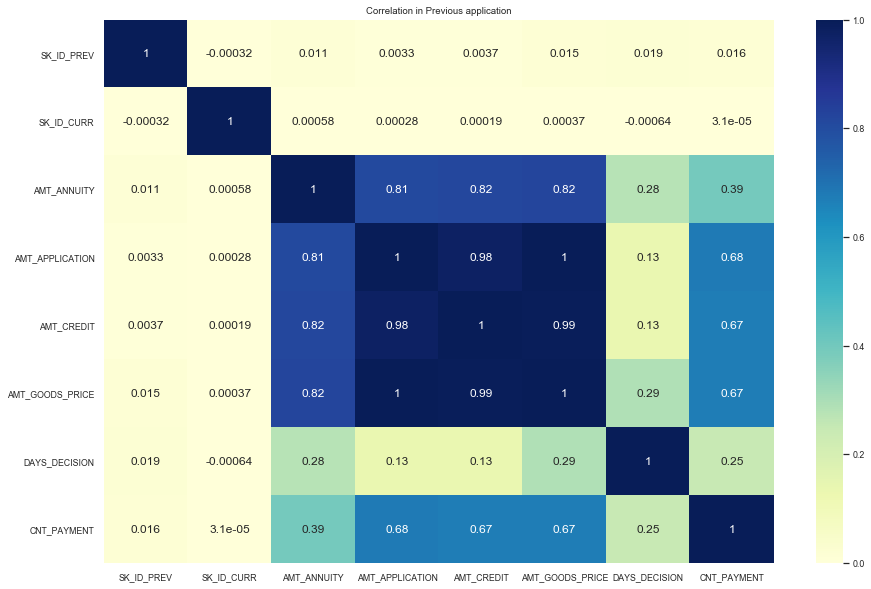

In [181]:
previous_master_corr = previous_master_df.corr()
plt.figure(figsize=(15,10))
sns.set(font_scale=0.8)
sns.heatmap(previous_master_corr, cmap="YlGnBu", annot=True, annot_kws={"fontsize":12})
plt.title('Correlation in Previous application')
plt.show()

Top correlation in previous application data:

1. AMT_GOOD_PRICE and AMT_CREDIT - 99%
2. AMT_APPLICATION and AMT_CREDIT - 98%
3. AMT_CREDIT and AMT_ANNUITY - 82%
4. AMT_ANNUITY and AMT_GOOD_PRICE - 82%
